Création des features...
Encodage des variables...
Entraînement...


C:\Users\nelma\AppData\Local\Temp\ipykernel_60164\3464861796.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis')


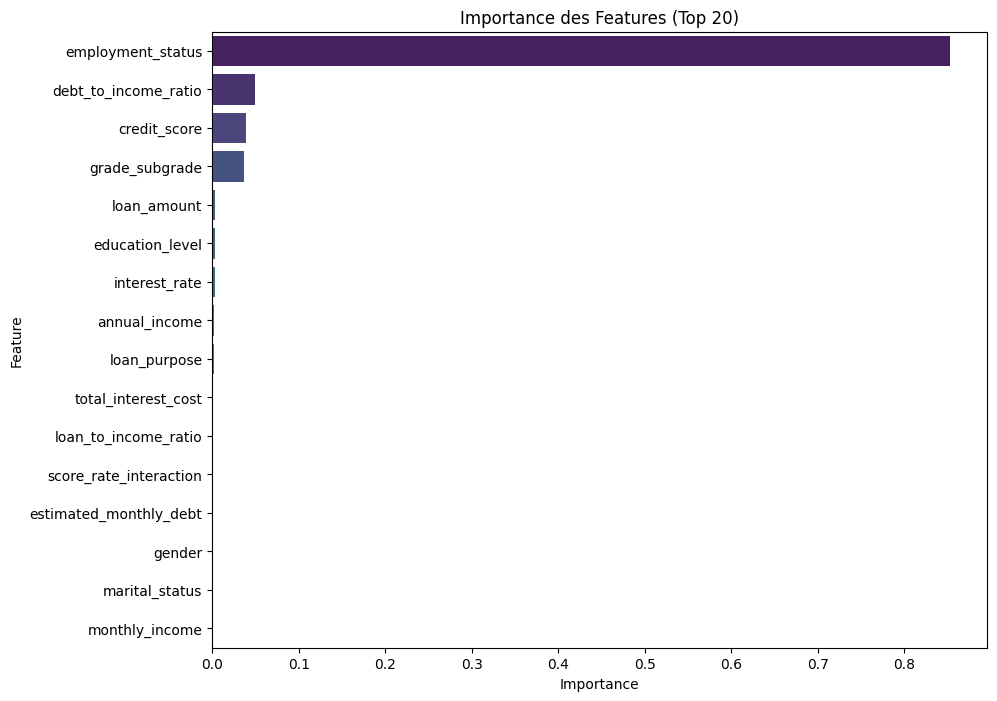

employment_status
Employed         0.894145
Retired          0.997204
Self-employed    0.898457
Student          0.263515
Unemployed       0.077619
Name: loan_paid_back, dtype: float64

Comptage des valeurs :
employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import sys
import os

# Astuce pour importer des modules depuis le dossier src/ dans un notebook
sys.path.append(os.path.abspath('..'))
from src.feature_engineering import create_features

# 1. Chargement
df_train = pd.read_csv("../data/raw/train.csv")

# 2. On applique ton Feature Engineering (pour voir si ça marche !)
print("Création des features...")
df_train = create_features(df_train)

# 3. Préparation X et y
X = df_train.drop(columns=['loan_paid_back', 'id'])
y = df_train['loan_paid_back']

# 4. Encodage (Le fix est là : on transforme le texte en chiffres)
print("Encodage des variables...")
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 5. Entraînement rapide
print("Entraînement...")
model = XGBClassifier(n_estimators=100, learning_rate=0.05, n_jobs=-1, random_state=42)
model.fit(X, y)

# 6. Visualisation
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
# On affiche le top 20 pour que ce soit lisible
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Importance des Features (Top 20)")
plt.show()

# 
print(df_train.groupby('employment_status')['loan_paid_back'].mean())
print("\nComptage des valeurs :")
print(df_train['employment_status'].value_counts())